# **Urban Productions: Movie Production Analysis**. 

## **Business Understanding**

### **Overview**
Urban Enterprises is a company that has decided to venture into the movie production industry and wants to build a new studio.   
The head of studio needs to know what type of films/movies to create.  
Our goal is to analyze movie performance data to provide insights on movie production.  
We are using datasets from: *Box Office Mojo*, *IMDB*, *The Numbers*

### **Problem Statement**
The company barely has any knowledge on what it entails to run a successful movie production business. Therefore, it requires research done on what types of films are currently doing the best in the industry. The stakeholders need meaningful insights on movie trends ie the top performing genres, in order to make decisions that will eventually be profitable for the investment.


### **Objectives**

1. Determine the best movie genres by examining total gross and movie ratings for the business to take steps that will maximize their profits and ensure return of investment. 

2. Compare production budgets for movies with their total gross over the years. 

3. Explore whether movie release months affect movie performance to suggest the best release strategies.









## **Data Understanding and Data Cleaning** 


In [ ]:
#importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


### Box Office Mojo Data

In [ ]:
#loading the dataset
bom_df = pd.read_csv("./Data/bom.movie_gross.csv")

In [ ]:
bom_df.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [4]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [ ]:
#changing foreign_gross to numeric
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors = 'coerce')


In [7]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

#### Data Cleaning

In [ ]:
#checking for duplicates
bom_df.duplicated().sum()

0

In [9]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [10]:
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [11]:
#missing value percentage
missing_percentage = (bom_df.isna().sum() / len(bom_df)) * 100
missing_percentage

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     40.005905
year               0.000000
dtype: float64

The missing values for the studio and domestic_gross are a small percentage of the whole data, so these values will be dropped.The foreign_gross has a large percentage of missing values hence they will have to be filled using either the mean or median depending in the data.

In [ ]:
#dropping missing values
bom_df=bom_df.dropna(subset=['studio'])

In [ ]:
#dropping null values 
bom_df=bom_df.dropna(subset=['domestic_gross'])

In [14]:
median_foreign=bom_df['foreign_gross'].median()
median_foreign

19600000.0

In [15]:
mean_foreign=bom_df['foreign_gross'].mean()
mean_foreign

75979668.67282717

The mean and the median are different which means we have asymmetrical(skewed) data. Therefore, we will fill the missing values using the median.

In [ ]:
#filling foreign_gross with median_foreign
bom_df['foreign_gross']=bom_df['foreign_gross'].fillna(median_foreign)

In [17]:
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### The Number Data

In [ ]:
#loading the dataset
tn_df = pd.read_csv("./Data/tn.movie_budgets.csv")

In [19]:
tn_df.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From this,The Number dataset has 5782 entries with 5 columns and no missing values. It also has the *production_budget*,*domestic_gross* and *worldwide_gross* as strings instead of numerics.

In [ ]:
#changing  these columns to numeric datatypes.after removing $ and commas 
tn_df['production_budget'] = tn_df['production_budget'].str.replace(r'[\$,]', '').astype(float)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(r'[\$,]', '').astype(float)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(r'[\$,]', '').astype(float)

In [ ]:
#confirming the datatypes
tn_df.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [ ]:
#checking for duplicates
tn_df.duplicated().sum()

0

In [ ]:
#checking for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This dataset has no duplicated values

### IMDB Data

In [25]:
conn=sqlite3.connect('./Data/im.db')

In [ ]:
#checking for tables in the dataset
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [27]:
pd.read_sql("SELECT * FROM movie_basics ;",conn).head(5)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [28]:
pd.read_sql("SELECT * FROM movie_ratings;",conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [29]:
pd.read_sql("SELECT * FROM persons;",conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [ ]:
#joining movie_basics and movie_ratings
im_df=pd.read_sql("""SELECT * FROM movie_basics
JOIN movie_ratings
                  USING (movie_id);""",conn)
im_df.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [31]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [32]:
im_df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [ ]:

im_df.duplicated().sum()

0

In [34]:
im_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [35]:
#missing value percentage   
missing_percentage_2= (im_df.isnull().sum() / len(im_df)) * 100
missing_percentage_2

movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

The genres column has only a 1% missing value data, so the missing values can be dropped.The runtime_minutes column has a 10% of missing values hence we need to fill the data out using either the mean or the median depending on the skewness.

In [36]:
im_df.dropna(subset=['genres'],inplace=True)

In [37]:
runtime_mean=im_df['runtime_minutes'].mean()
runtime_mean

94.7322732805843

In [38]:
runtime_median=im_df['runtime_minutes'].median()
runtime_median

91.0

The mean is not equal to the median, thus the data is skewed.Hence we'll fill out the missing values using the median

In [39]:
im_df['runtime_minutes']=im_df['runtime_minutes'].fillna(im_df['runtime_minutes'].median())

In [40]:
im_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

## **Data Preparation, Analysis and Visualizations for Objectives**

### **Objective 1: Genre vs Total Gross and Ratings**

#### Data Preparation

In [ ]:
im_df_analysis = im_df.copy()
im_df.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [42]:
bom_df_analysis = bom_df.copy()
bom_df_analysis.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [43]:
#Creating a total gross column
bom_df_analysis['total_gross'] = (bom_df_analysis['domestic_gross'] + bom_df_analysis['foreign_gross']).astype(int)
bom_df_analysis.head(2)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000


In [44]:
# Split the genre strings into lists
im_df_analysis['genres'] = im_df_analysis['genres'].str.split(',')

# Expand(explode) each list into separate rows (one genre per movie)
im_df_analysis = im_df_analysis.explode('genres')

im_df_analysis.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [45]:
#Merging IMDB and Box Office dataframes
analysis_df = pd.merge(bom_df_analysis, im_df_analysis, left_on='title', right_on='primary_title', how='inner')
analysis_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Adventure,8.3,682218
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Animation,8.3,682218
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Comedy,8.3,682218
3,Inception,WB,292600000.0,535700000.0,2010,828300000,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066
4,Inception,WB,292600000.0,535700000.0,2010,828300000,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066


#### Data Analysis and Visualization

In [46]:
#Grouping genres using averagerating and total_gross
genre_comparison = analysis_df.groupby('genres')[['averagerating', 'total_gross']].mean().reset_index()
genre_comparison

,genres,averagerating,total_gross
0,Action,6.277031,1.716616e+08
1,Adventure,6.482151,2.766113e+08
2,Animation,6.698013,2.605552e+08
3,Biography,6.973333,5.456470e+07
4,Comedy,6.254496,9.035181e+07
5,Crime,6.480688,5.822132e+07
6,Documentary,7.291928,3.991046e+07
7,Drama,6.592546,4.826971e+07
8,Family,6.220690,1.239565e+08
9,Fantasy,6.247337,1.675219e+08


In [47]:
#Creating ranks for each genre according to rating ranks and gross ranks
genre_comparison['combined_rank'] = (
    genre_comparison['averagerating'].rank(ascending=False) +
    genre_comparison['total_gross'].rank(ascending=False))
genre_comparison = genre_comparison.sort_values(by='combined_rank')
genre_comparison

,genres,averagerating,total_gross,combined_rank
2,Animation,6.698013,2.605552e+08,11.0
1,Adventure,6.482151,2.766113e+08,13.0
18,Sport,6.867925,9.031634e+07,13.0
17,Sci-Fi,6.458209,2.916174e+08,14.0
3,Biography,6.973333,5.456470e+07,18.0
0,Action,6.277031,1.716616e+08,20.0
10,History,6.883582,5.011748e+07,20.0
6,Documentary,7.291928,3.991046e+07,21.0
21,Western,6.561905,6.681460e+07,22.0
15,News,7.100000,3.091035e+07,23.0


*Note that combined_rank column shows ranks of each genre hence lower combined_rank = better performing genre.*

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


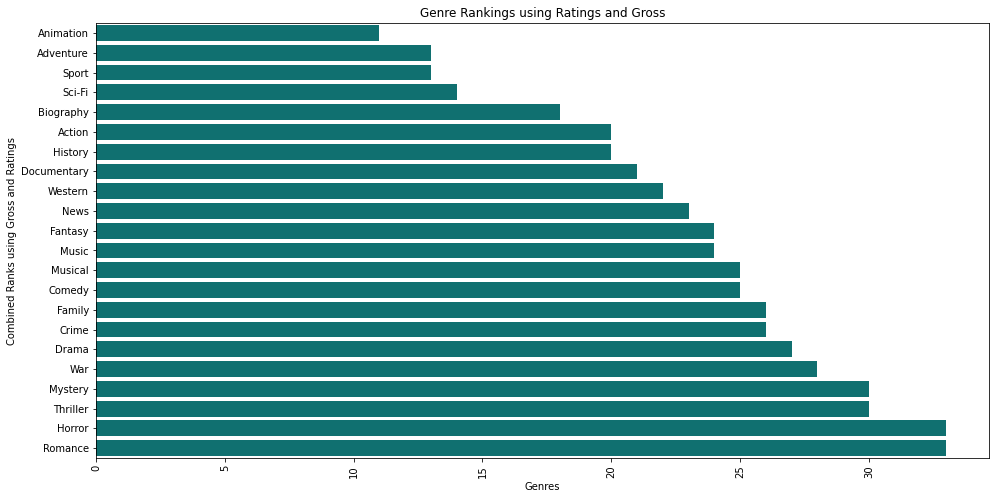

In [48]:
#Plotting genres according to their ranks
plt.figure(figsize = (16,8))
sns.barplot(genre_comparison['combined_rank'],genre_comparison['genres'], color='teal')
plt.xticks(rotation=90)
plt.title('Genre Rankings using Ratings and Gross')
plt.xlabel('Genres')
plt.ylabel('Combined Ranks using Gross and Ratings');

From the above analysis and visualization, our results show that animation is the best performing genre followed by adventure and sports. Romance, Horror and Thriller appear to be the lowest performing genres.

We are also checking if the ratings affect the gross ie the relationship between the two.

In [49]:
#Correlation/relationship between rating and gross
correlation = np.corrcoef(analysis_df['averagerating'],analysis_df['total_gross'])[0,1]
correlation

0.150542119204045

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


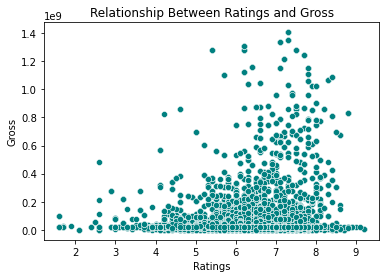

In [50]:
#Plotting the relationship between ratings and gross
sns.scatterplot(analysis_df['averagerating'],analysis_df['total_gross'], color='teal')
plt.title('Relationship Between Ratings and Gross')
plt.xlabel('Ratings')
plt.ylabel('Gross');

The above analysis and visualization shows that there is no significant correlation between ratings and the gross earned. This means a movie can have a small rating and still earn a lot.  
A movie's gross earned may be affected by other factors beyond viewers opinions.

### **Objective 2: Production Budget vs Total Gross over the years**

#### Data Preparation

In [51]:
tn_df_analysis = tn_df.copy()
tn_df_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [52]:
tn_df_analysis.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [53]:
#changing the date column into the correct datetime format
tn_df_analysis['release_date'] = pd.to_datetime(tn_df_analysis['release_date'], errors='coerce')

#creating a column with year only
tn_df_analysis['year'] = tn_df_analysis['release_date'].dt.year

In [54]:
tn_df_analysis.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011


In [55]:
#Grouping years according to production_budget and worldwide_gross
yearly_avg = tn_df_analysis.groupby('year')[['production_budget', 'worldwide_gross']].mean().reset_index()

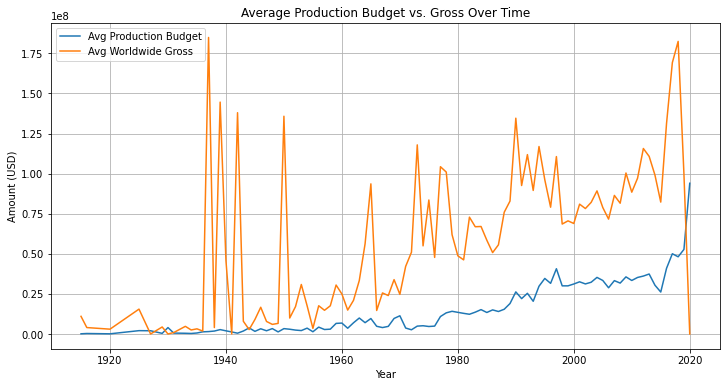

In [56]:
#Plotting time series for production_budget and worldwide_gross
plt.figure(figsize=(12,6))
plt.plot(yearly_avg['year'], yearly_avg['production_budget'], label='Avg Production Budget')
plt.plot(yearly_avg['year'], yearly_avg['worldwide_gross'], label='Avg Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Amount (USD)')
plt.title('Average Production Budget vs. Gross Over Time')
plt.legend()
plt.grid(True)
plt.show()

Over the years both production budgets and gross amounts increase but with the profits between them increasing. This means that the film industry is growing as years go by. Therefore, it's advisable to invest higher budgets as time goes by to ensure a higher return of your investment.  

*Note that in 2020 the profit margin was small i.e close to none. This was due to the COVID-19 pandemic.*

We are also checking how much the production budget affects the gross ie relationship between the two.

In [57]:
#Correlation between production_budget and world_wide gross
tn_df_analysis['production_budget'].corr(tn_df_analysis['worldwide_gross'])

0.7483059765694758

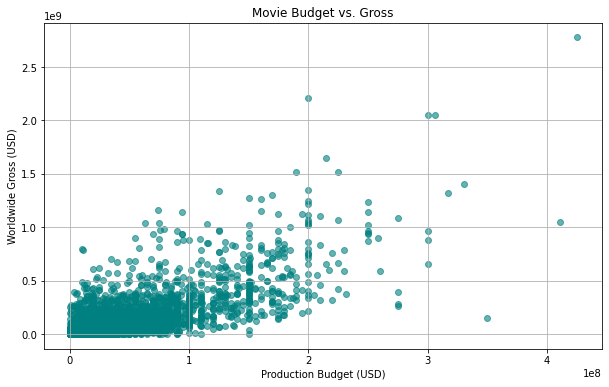

In [58]:
#Plotting relationship between production_budget and worldwide_gross
plt.figure(figsize=(10,6))
plt.scatter(tn_df_analysis['production_budget'], tn_df_analysis['worldwide_gross'], alpha=0.6, color='teal')
plt.xlabel('Production Budget (USD)')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Movie Budget vs. Gross')
plt.grid(True)
plt.show()

There is a good relationship ie high correlation between budget and gross. This means the production budget amount affect the gross return greatly. 

### **Objective 3: Profit and Return on Investment(ROI) According to Release Months**

#### Data Preparation

In [59]:
tn_df_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [60]:
#converting release date to datetime and extracting month names
tn_df_analysis['release_date'] = pd.to_datetime(tn_df_analysis['release_date'])
tn_df_analysis['release_month_name'] = tn_df_analysis['release_date'].dt.month_name()

#Ensuring release months are ordered from January to December
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
tn_df_analysis['release_month_name'] = pd.Categorical(tn_df_analysis['release_month_name'],
                                                      categories=month_order, ordered=True)
tn_df_analysis.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,release_month_name
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May


In [61]:
# Creating columns with profits and return on investments(ROI)
tn_df_analysis['profit'] =( tn_df_analysis['worldwide_gross'] - tn_df_analysis['production_budget']).astype(int)
tn_df_analysis['ROI'] = (tn_df_analysis['profit'] / tn_df_analysis['production_budget']) * 100
tn_df_analysis.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,release_month_name,profit,ROI
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,December,-2147483648,-505.290270
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May,635063875,154.667286


#### Data Analysis and Visualization

In [62]:
#Grouping months with the mean budget, mean profit and mean ROI
month_analysis = tn_df_analysis.groupby('release_month_name').agg(
    mean_budget=('production_budget', 'mean'),
    mean_profit=('profit', 'mean'),
    mean_ROI=('ROI', 'mean'),
).sort_values(by='release_month_name')
month_analysis

,mean_budget,mean_profit,mean_ROI
release_month_name,,,
January,2.084349e+07,2.572033e+07,319.898612
February,2.804642e+07,4.349811e+07,354.781188
March,3.078208e+07,4.985129e+07,344.964636
April,2.380283e+07,3.611743e+07,277.672649
May,4.713520e+07,1.151328e+08,435.102925
June,4.309912e+07,9.942391e+07,688.971450
July,4.254616e+07,9.841746e+07,504.011321
August,2.555609e+07,3.542232e+07,438.037601
September,2.181290e+07,2.488078e+07,282.450998


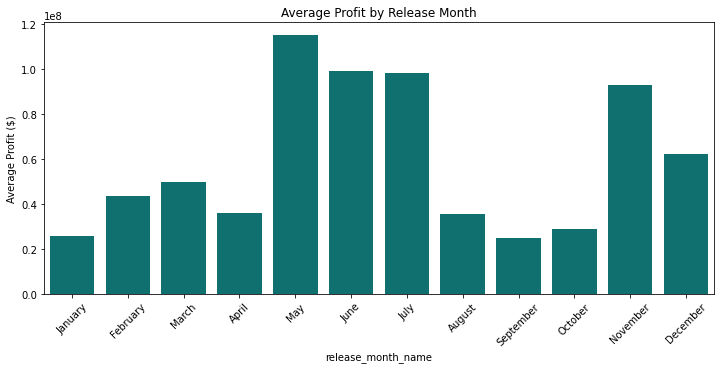

In [63]:
#Plotting profits by month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='mean_profit', color='teal')
plt.title("Average Profit by Release Month")
plt.xticks(rotation=45)
plt.ylabel("Average Profit ($)")
plt.show()

From our analysis and visualization, may, june and july have the highest average profits in the film industry

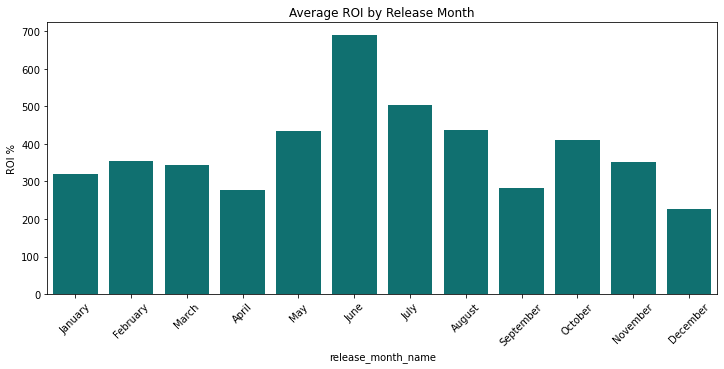

In [64]:
#Plotting ROI by month
plt.figure(figsize=(12,5))
sns.barplot(data=month_analysis, x=month_analysis.index, y='mean_ROI', color='teal')
plt.title("Average ROI by Release Month")
plt.xticks(rotation=45)
plt.ylabel("ROI %")
plt.show()

From our analysis and visualization, may, june and july have the highest average ROIs in the film industry

## **Recommendations**

1. According to our rank, the best performing genre in the film industry is Animation, followed by Adventure and Sport. Thriller, Horror and Romance are the least rewarding genres to invest in. Therefore, we recommend that Urban Productions invests more in Animation, Adventure and Sport genres.

2. As studios spend more on movies' production budget, the gross earned increases too. It is recommendable to allocate high budgets for films since viewers reward the spending, which ensures return of profits.

3. Movies do best within the May to July period. On the other hand, January, September and October are the least performing months in the film industry. It is hence ideal to have movie releases during the May to July period.

## **Conclusions**

Overall, the project provided valuable insights into the factors influencing movie success in the film industry. By analyzing genres, production budgets, and release periods, we identified trends that affect a film’s performance. The findings show that a movie's success is determined by genre selection, sufficient budgeting and strategic release timing. Therefore, this analysis guides Urban Productions in making informed decisions in venturing into the film industry.